<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_circles

In [51]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.1,
                    random_state=42)

In [52]:
X,y

(array([[ 0.71210844,  0.28469831],
        [-0.67871584,  0.20727355],
        [-0.86602567,  0.34365139],
        ...,
        [-0.10655608, -0.86643656],
        [ 0.63726196, -0.85741166],
        [ 0.27181056,  0.97619727]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [53]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "Y": y})
circles

,X1,X2,Y
0,0.712108,0.284698,1
1,-0.678716,0.207274,1
2,-0.866026,0.343651,1
3,-0.517648,0.620599,1
4,0.454089,-0.890466,0
...,...,...,...
995,0.261683,0.879943,0
996,-1.002156,-0.327634,0
997,-0.106556,-0.866437,1
998,0.637262,-0.857412,0


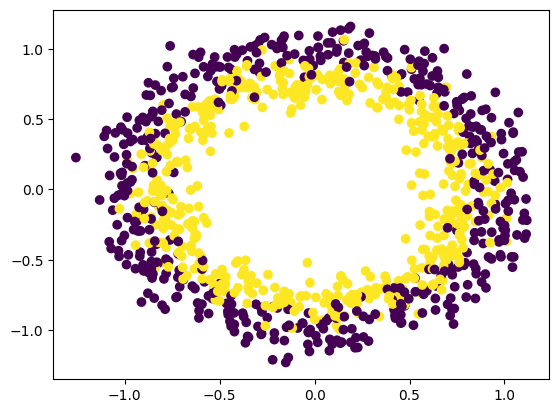

In [54]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Build first model

In [55]:
import tensorflow as tf


tf.random.set_seed(42)

In [56]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model1.fit(tf.constant(X), tf.constant(y), epochs=200, verbose = 0)

In [57]:
model1.evaluate(tf.constant(X), tf.constant(y))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4742 - loss: 0.6928  


[0.6932846307754517, 0.4659999907016754]

## Build model 2

In [58]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model2.fit(tf.constant(X), tf.constant(y), epochs=200, verbose = 0)

In [59]:
model2.evaluate(tf.constant(X), tf.constant(y))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5033 - loss: 0.6927  


[0.6944347023963928, 0.4860000014305115]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


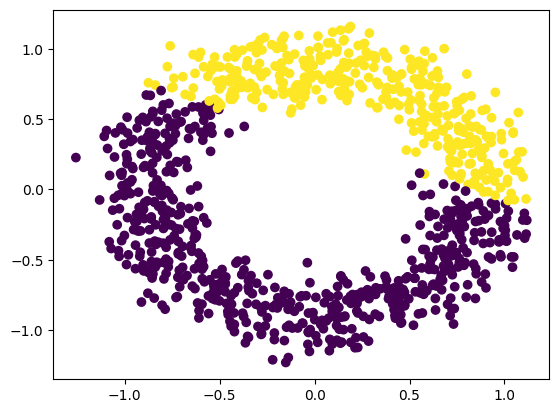

In [60]:
preds = model2.predict(tf.constant(X))

plt.scatter(X[:, 0], X[:, 1], c=tf.squeeze(tf.round(preds)))
plt.show()

## Building a non linear model

In [72]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"])

history = model3.fit(tf.constant(X[:800]), tf.constant(y[:800]), epochs = 200, verbose = 0)

In [73]:
model3.evaluate(tf.constant(X[800:]), tf.constant(y[800:]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8435 - loss: 0.3767  


[0.3743170201778412, 0.8500000238418579]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


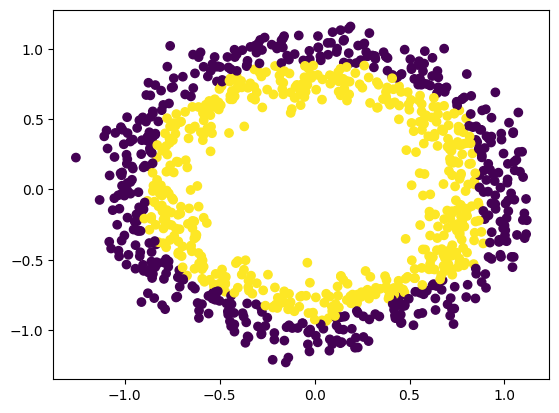

In [74]:
preds = model3.predict(tf.constant(X))

plt.scatter(X[:, 0], X[:, 1], c=tf.squeeze(tf.round(preds)))
plt.show()

## Plot loss curve

Text(0.5, 0, 'epochs')

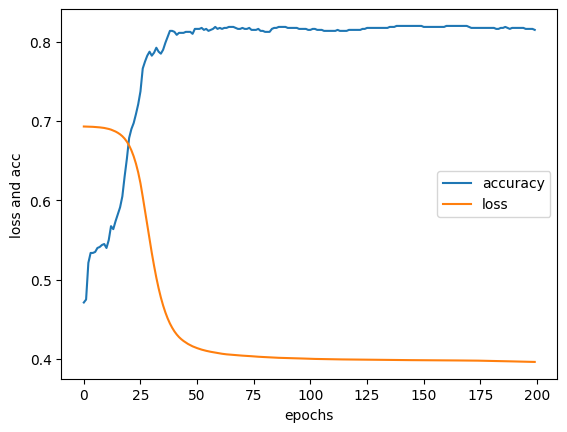

In [77]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss and acc")
plt.xlabel("epochs")

## Finding best lr

In [84]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model4.fit(tf.constant(X[:800]), tf.constant(y[:800]), epochs = 100, verbose = 0,
                    callbacks = [lr_scheduler])

In [85]:
model4.evaluate(tf.constant(X[800:]), tf.constant(y[800:]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 0.7222  


[0.7609759569168091, 0.4950000047683716]

## Plot learning rate vs loss

<Axes: >

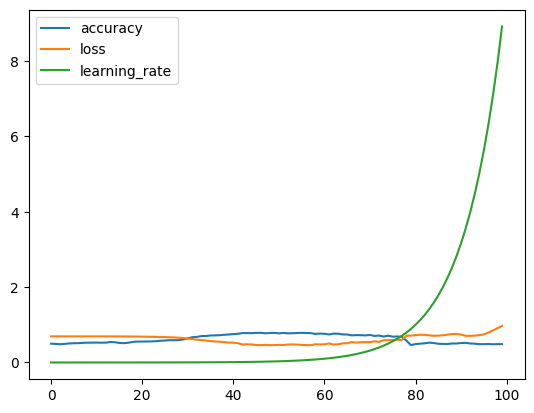

In [86]:
pd.DataFrame(history.history).plot()

Text(0, 0.5, 'loss')

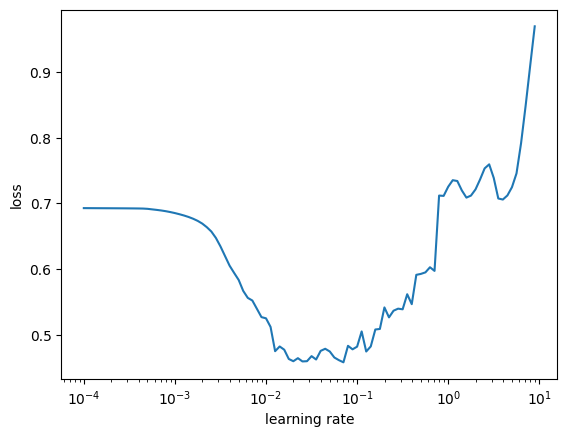

In [96]:
df = pd.DataFrame(history.history)
plt.semilogx(df["learning_rate"], df["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

## testing new learning rate

In [106]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
               metrics = ["accuracy"])


history = model5.fit(tf.constant(X[:800]), tf.constant(y[:800]), epochs = 50, verbose = 0)

In [107]:
model5.evaluate(tf.constant(X[800:]), tf.constant(y[800:]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.3904  


[0.4047795832157135, 0.8500000238418579]

<Axes: >

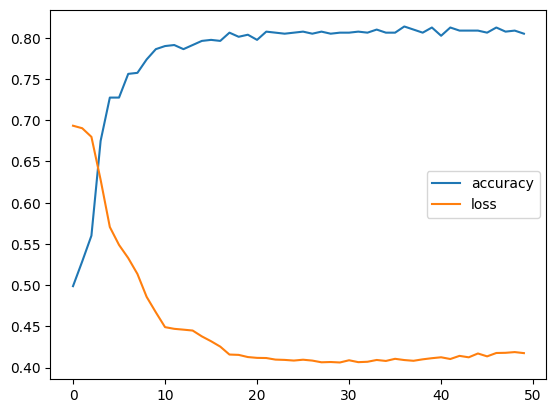

In [108]:
pd.DataFrame(history.history).plot()

In [112]:
## model prediction
preds = model5.predict(tf.constant(X))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


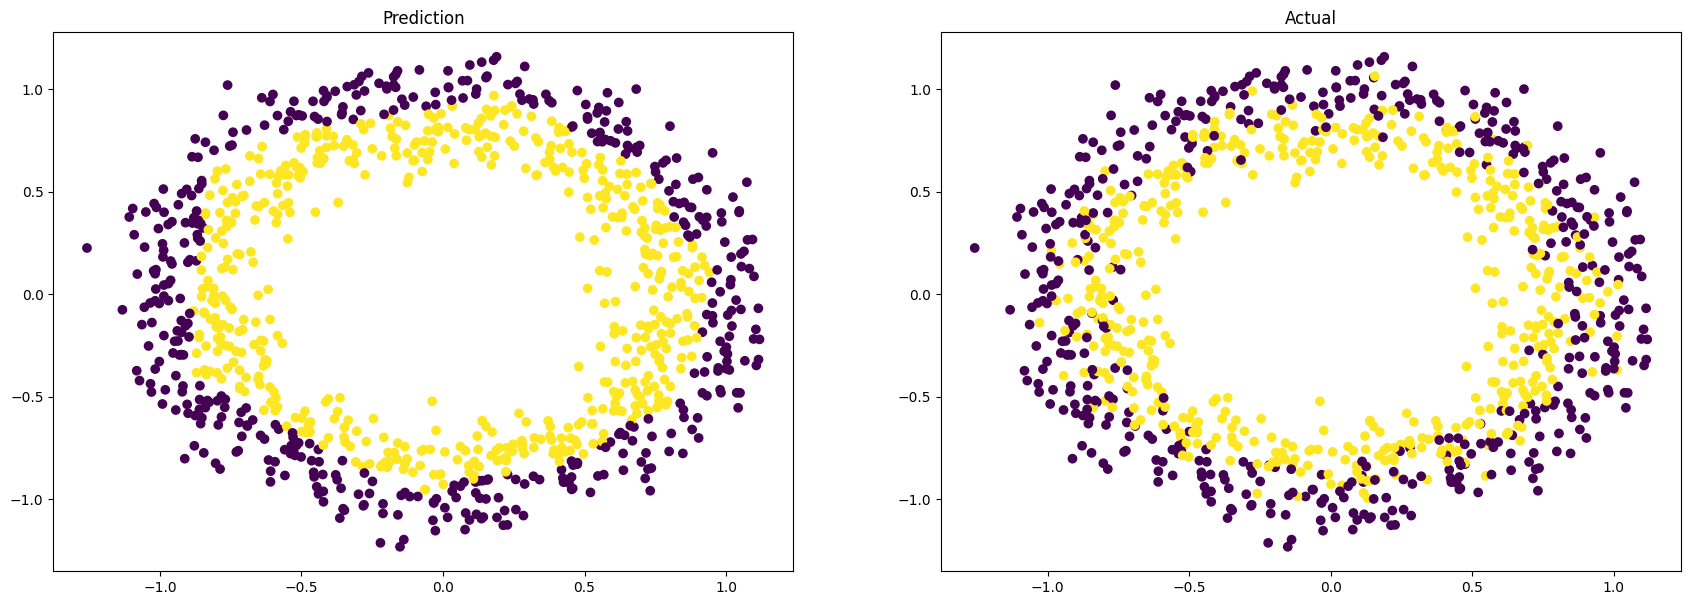

In [115]:
plt.figure(figsize = (21,7))
plt.subplot(1, 2, 1)
plt.title("Prediction")
plt.scatter(X[:, 0], X[:, 1], c=tf.squeeze(tf.round(preds)))
plt.subplot(1, 2, 2)
plt.title("Actual")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Notes about other metrics

* recall
* accuracy
* f1 score
* confusion matrix
* precision

## Confusion Matrix for model 5

In [116]:
import sklearn

In [117]:
preds_on_test = model5.predict(tf.constant(X[800:]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


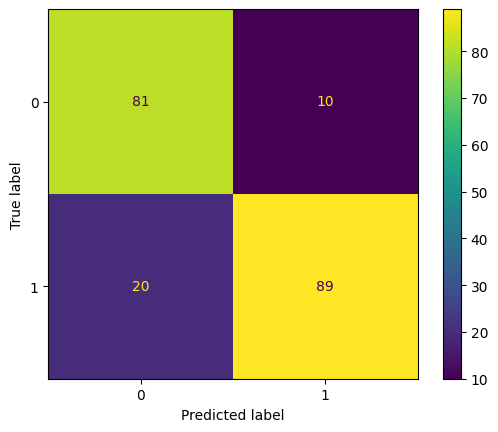

In [124]:
conf = sklearn.metrics.confusion_matrix(pd.DataFrame(tf.round((preds_on_test))),pd.DataFrame(y[800:]))
sklearn.metrics.ConfusionMatrixDisplay(conf).plot()